In [39]:
taxi_data_df.to_csv('updated_taxi_data_zones_commercial_airport2.csv', index = False)

Since my testing dataset includes points outside of NYC's districts and zones, I will apply a separate, k-means clustering to these regions and classify them relative to their spatial location to the city's boroughs.

In [44]:
taxi_data.isna().sum()

id                                   0
vendor_id                            0
pickup_datetime                      0
dropoff_datetime                     0
passenger_count                      0
pickup_longitude                     0
pickup_latitude                      0
dropoff_longitude                    0
dropoff_latitude                     0
store_and_fwd_flag                   0
trip_duration                        0
month                                0
day                                  0
hour                                 0
minute                               0
calculated_distance                  0
calculated_duration                  0
day_of_week                          0
date                                 0
average temperature                  0
precipitation                        0
snow fall                            0
snow depth                           0
is_holiday                           0
decoded_polyline                  4142
pickup_zone              

In [167]:
taxi_zones = pd.read_csv('taxi_zones.csv')

In [168]:

taxi_zones['geometry'] = taxi_zones['the_geom'].apply(wkt.loads)
taxi_zones_gdf = gpd.GeoDataFrame(taxi_zones, geometry='geometry')

taxi_zones_gdf['centroid'] = taxi_zones_gdf.geometry.centroid

city_center = taxi_zones_gdf['centroid'].unary_union.centroid
central_lat, central_lon = city_center.y, city_center.x

In [169]:

missing_pickup = taxi_data[taxi_data['pickup_borough'].isnull()]
missing_dropoff = taxi_data[taxi_data['dropoff_borough'].isnull()]

The following are the pickup and dropoff points beyond the city's zones. Their spatial distribution makes perfect sense considering the spatial structure of NYC that I visualized before. A line of points between Manhattan and Queens,Brooklyn are likely points on the bridges that connect the two coasts.

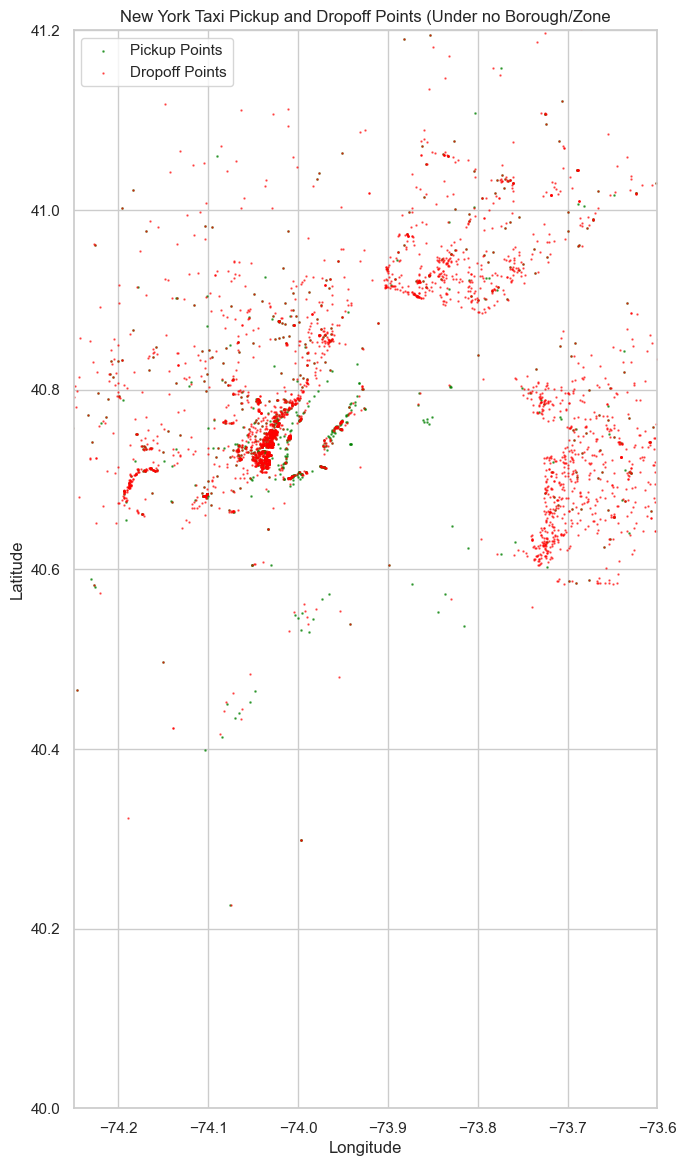

In [125]:

gdf_all_pickup = gpd.GeoDataFrame(missing_pickup, geometry=gpd.points_from_xy(missing_pickup.pickup_longitude, missing_pickup.pickup_latitude))
gdf_all_dropoff = gpd.GeoDataFrame(missing_dropoff, geometry=gpd.points_from_xy(missing_dropoff.dropoff_longitude, missing_dropoff.dropoff_latitude))

lon_range = (-74.25, -73.6)
lat_range = (40.0, 41.2)

fig, ax = plt.subplots(1, 1, figsize=(14, 14))
ax.set_xlim(lon_range)
ax.set_ylim(lat_range)


gdf_all_pickup.plot(ax=ax, marker='o', color='green', markersize=0.8, label='Pickup Points', alpha=0.6)


gdf_all_dropoff.plot(ax=ax, marker='o', color='red', markersize=0.5, label='Dropoff Points', alpha=0.6)

ax.set_title('New York Taxi Pickup and Dropoff Points (Under no Borough/Zone')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend()

plt.show()

In [188]:

k = 8  

kmeans_pickup = KMeans(n_clusters=k, random_state=0).fit(missing_pickup[['pickup_latitude', 'pickup_longitude']])
missing_pickup['pickup_cluster'] = kmeans_pickup.labels_

kmeans_dropoff = KMeans(n_clusters=k, random_state=0).fit(missing_dropoff[['dropoff_latitude', 'dropoff_longitude']])
missing_dropoff['dropoff_cluster'] = kmeans_dropoff.labels_

C:\Users\elkok\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\elkok\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\elkok\AppData\Local\Temp\ipykernel_19488\858740071.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_pickup['pickup_cluster'] = kmeans_pickup.labels_
C:\Users\elkok\anaconda3\lib\site-packages\sklearn\cluster\_kme

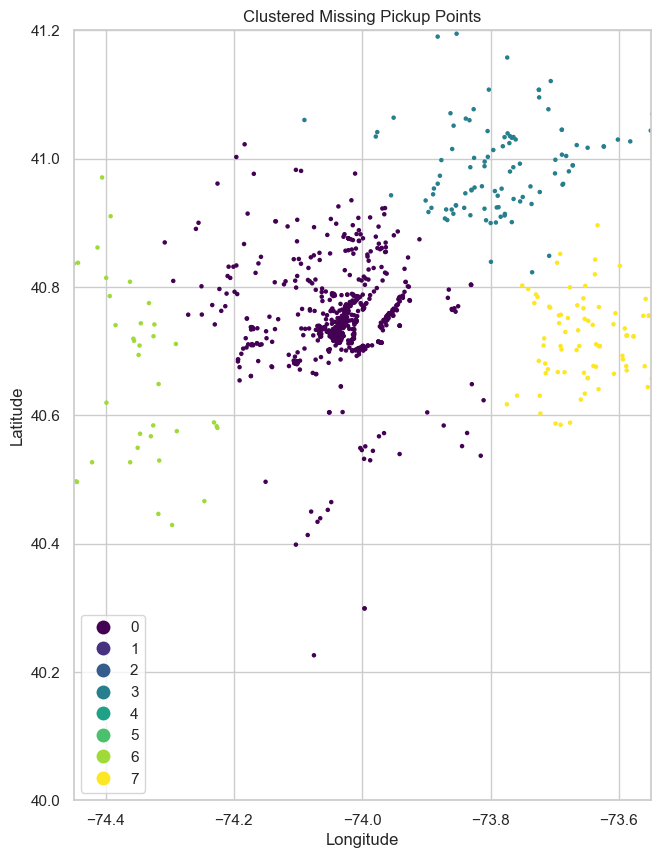

In [189]:

gdf_missing_pickup = gpd.GeoDataFrame(missing_pickup, geometry=gpd.points_from_xy(missing_pickup.pickup_longitude, missing_pickup.pickup_latitude))


lon_range = (-74.45, -73.55)
lat_range = (40.0, 41.2)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_xlim(lon_range)
ax.set_ylim(lat_range)
gdf_missing_pickup.plot(ax=ax, column='pickup_cluster', marker = 'o', categorical=True, legend=True, markersize=5, cmap='viridis')

ax.set_title('Clustered Missing Pickup Points')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()


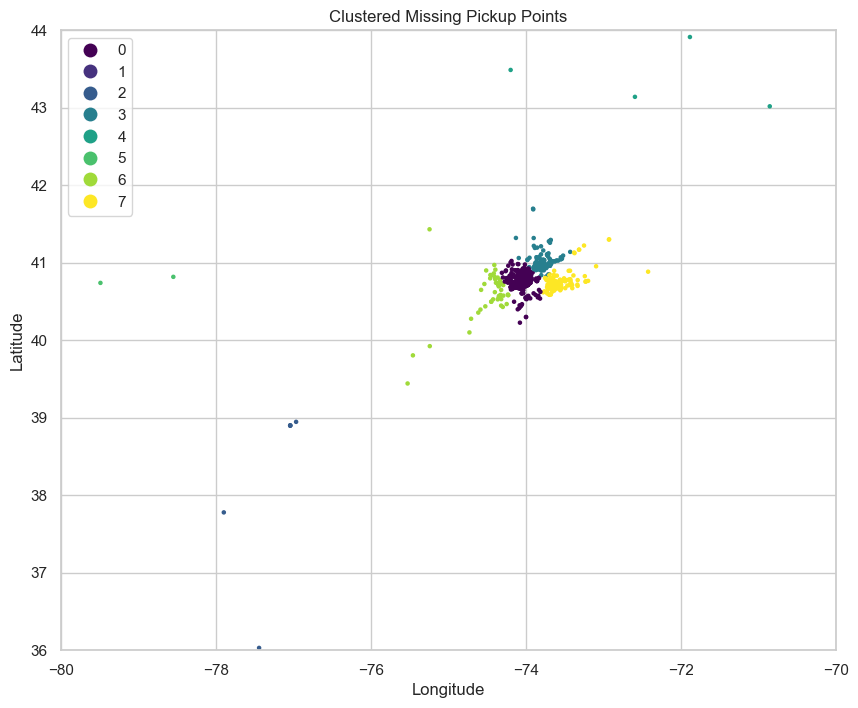

In [190]:

gdf_missing_pickup = gpd.GeoDataFrame(missing_pickup, geometry=gpd.points_from_xy(missing_pickup.pickup_longitude, missing_pickup.pickup_latitude))


lon_range = (-80, -70)
lat_range = (36.0, 44)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_xlim(lon_range)
ax.set_ylim(lat_range)
gdf_missing_pickup.plot(ax=ax, column='pickup_cluster', marker = 'o', categorical=True, legend=True, markersize=5, cmap='viridis')

ax.set_title('Clustered Missing Pickup Points')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()

C:\Users\elkok\AppData\Local\Temp\ipykernel_19488\254359313.py:19: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  cluster_data.plot(ax=ax, color=color, marker = 'o', markersize=5, label=f'Cluster {cluster}', alpha=0.5)


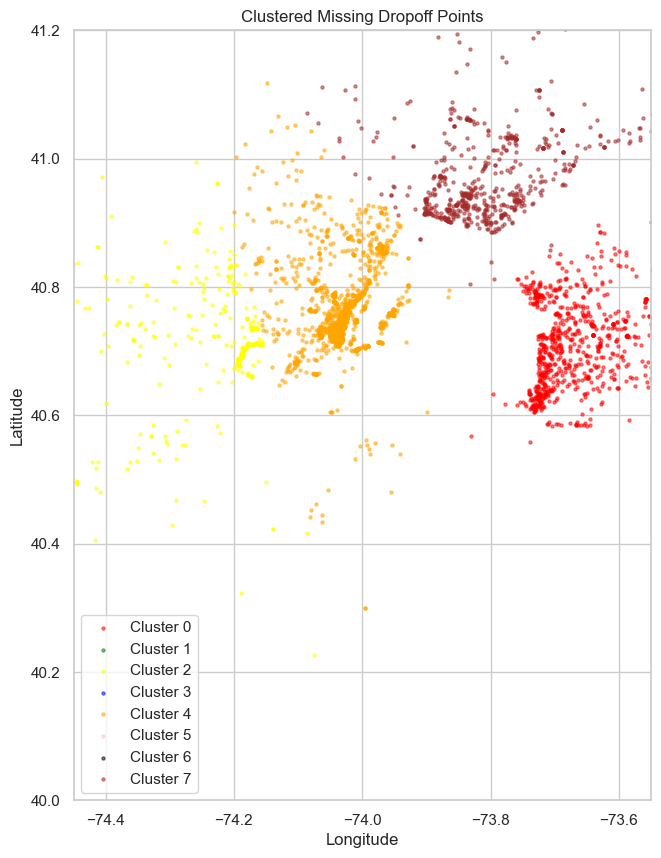

In [191]:
gdf_missing_dropoff = gpd.GeoDataFrame(missing_dropoff, geometry=gpd.points_from_xy(missing_dropoff.dropoff_longitude, missing_dropoff.dropoff_latitude))

lon_range = (-74.45, -73.55)
lat_range = (40.0, 41.2)
cluster_colors = {0: 'red', 1: 'green', 2: 'yellow', 3: 'blue', 4: 'orange', 5:'pink', 6: 'black', 7: 'brown', 8: 'cyan', 9: 'magenta', 10: 'grey'}
gdf_missing_dropoff['color'] = gdf_missing_dropoff['dropoff_cluster'].map(cluster_colors)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_xlim(lon_range)
ax.set_ylim(lat_range)

for cluster, color in cluster_colors.items():
    cluster_data = gdf_missing_dropoff[gdf_missing_dropoff['dropoff_cluster'] == cluster]
    cluster_data.plot(ax=ax, color=color, marker = 'o', markersize=5, label=f'Cluster {cluster}', alpha=0.5)

ax.set_title('Clustered Missing Dropoff Points')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend()

plt.show()

C:\Users\elkok\AppData\Local\Temp\ipykernel_19488\1373943650.py:20: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  cluster_data.plot(ax=ax, color=color, marker = 'o', markersize=5, label=f'Cluster {cluster}', alpha=0.5)


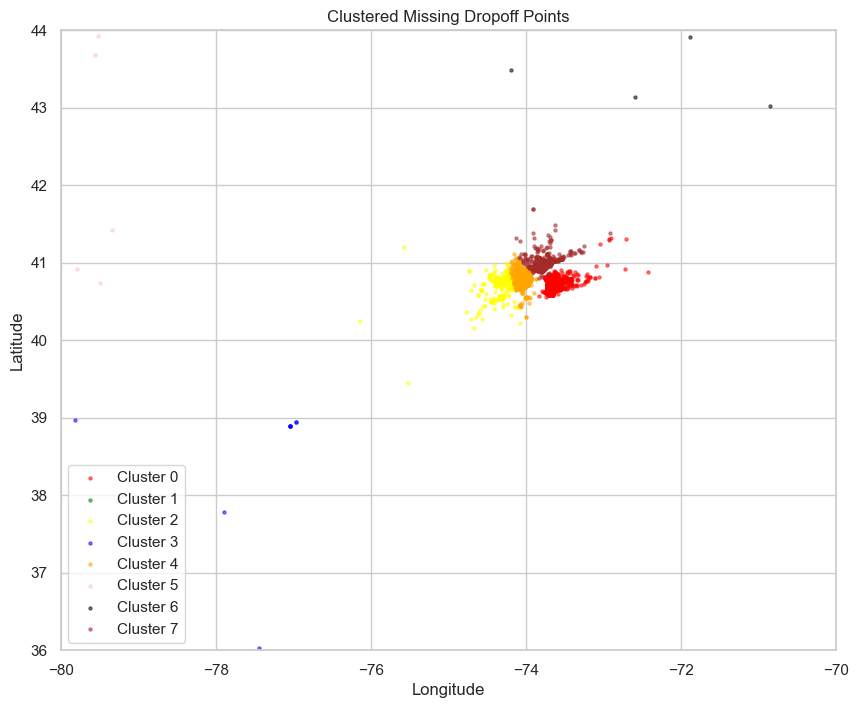

In [192]:
gdf_missing_dropoff = gpd.GeoDataFrame(missing_dropoff, geometry=gpd.points_from_xy(missing_dropoff.dropoff_longitude, missing_dropoff.dropoff_latitude))

lon_range = (-80, -70)
lat_range = (36.0, 44)

cluster_colors = {0: 'red', 1: 'green', 2: 'yellow', 3: 'blue', 4: 'orange', 5:'pink', 6: 'black', 7: 'brown', 8: 'cyan', 9: 'magenta', 10: 'grey'}
gdf_missing_dropoff['color'] = gdf_missing_dropoff['dropoff_cluster'].map(cluster_colors)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_xlim(lon_range)
ax.set_ylim(lat_range)

for cluster, color in cluster_colors.items():
    cluster_data = gdf_missing_dropoff[gdf_missing_dropoff['dropoff_cluster'] == cluster]
    cluster_data.plot(ax=ax, color=color, marker = 'o', markersize=5, label=f'Cluster {cluster}', alpha=0.5)

ax.set_title('Clustered Missing Dropoff Points')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend()

plt.show()


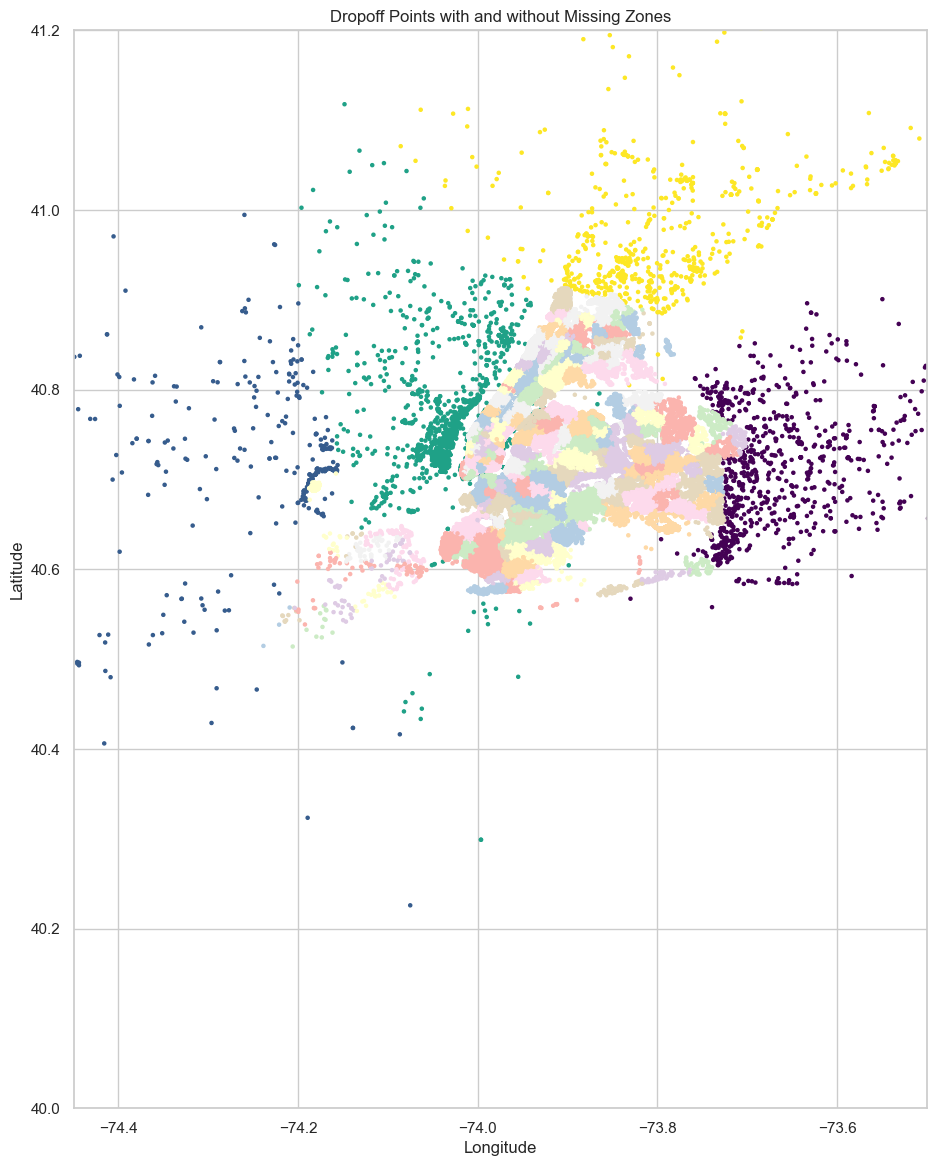

In [176]:

non_missing_dropoff = taxi_data[taxi_data['dropoff_zone'].notna()]

gdf_missing_dropoff = gpd.GeoDataFrame(missing_dropoff, geometry=gpd.points_from_xy(missing_dropoff.dropoff_longitude, missing_dropoff.dropoff_latitude))

gdf_non_missing_dropoff = gpd.GeoDataFrame(non_missing_dropoff, geometry=gpd.points_from_xy(non_missing_dropoff.dropoff_longitude, non_missing_dropoff.dropoff_latitude))

fig, ax = plt.subplots(1, 1, figsize=(14, 14))
lon_range = (-74.45, -73.5)
lat_range = (40.0, 41.2)    
ax.set_xlim(lon_range)
ax.set_ylim(lat_range)

gdf_missing_dropoff.plot(ax=ax, column='dropoff_cluster', categorical=True, legend=False, markersize=5, cmap='viridis', label='Clustered Missing Dropoff')

gdf_non_missing_dropoff.plot(ax=ax, column='dropoff_zone', categorical=True, legend=False, markersize=5, cmap='Pastel1', label='Non-Missing Dropoff Zone')

ax.set_title('Dropoff Points with and without Missing Zones')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()

In [193]:
taxi_zones = pd.read_csv('taxi_zones.csv')

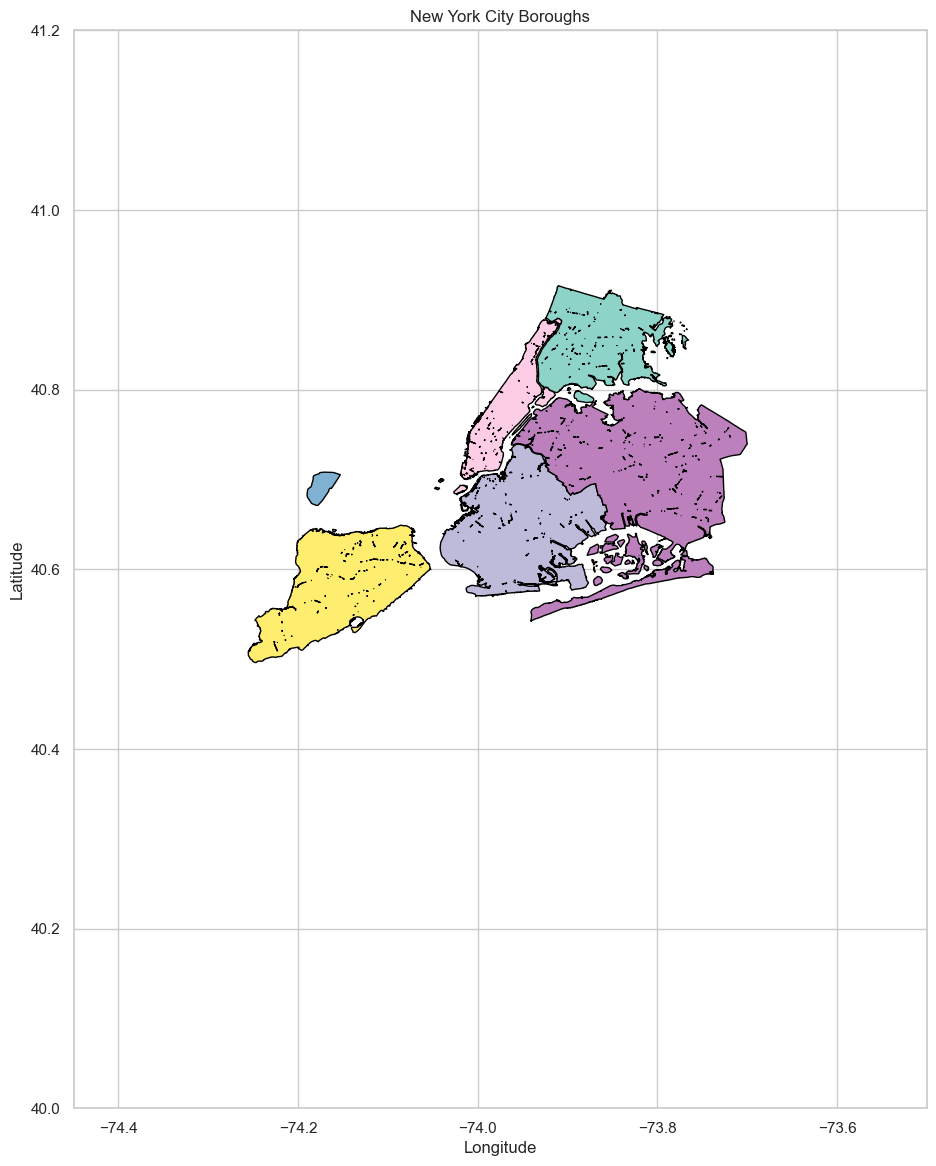

In [195]:
taxi_zones['geometry'] = taxi_zones['the_geom'].apply(wkt.loads)
taxi_zones_gdf = gpd.GeoDataFrame(taxi_zones, geometry='geometry')

fig, ax = plt.subplots(1, 1, figsize=(14, 14))
lon_range = (-74.45, -73.5) 
lat_range = (40.0, 41.2)  
ax.set_xlim(lon_range)
ax.set_ylim(lat_range)

boroughs = taxi_zones_gdf.dissolve(by='borough')
boroughs.plot(ax=ax, cmap='Set3', edgecolor='black', legend=True)

ax.set_title('New York City Boroughs')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()


In [196]:

borough_boundaries_gdf = taxi_zones_gdf.dissolve(by='borough')
interior_zones_gdf = taxi_zones_gdf 

fig, ax = plt.subplots(1, 1, figsize=(14, 14))
lon_range = (-74.45, -73.5) 
lat_range = (40.0, 41.2)   
ax.set_xlim(lon_range)
ax.set_ylim(lat_range)


borough_boundaries_gdf.boundary.plot(ax=ax, edgecolor='black', linewidth=1)


interior_zones_gdf.plot(ax=ax, color='lightgrey', alpha=0.5, edgecolor='grey')


gdf_missing_dropoff.plot(ax=ax, column='dropoff_cluster', categorical=True, legend=False, markersize=5, cmap='viridis')


gdf_non_missing_dropoff.plot(ax=ax, column='dropoff_zone', categorical=True, legend=False, markersize=5, cmap='Pastel1')

ax.set_title('Dropoff Points with Borough and Zone Boundaries')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

borough_labels = borough_boundaries_gdf.index.to_list()
borough_patches = [plt.Line2D([0], [0], color='black', label=label) for label in borough_labels]
ax.legend(handles=borough_patches, title='Boroughs')
plt.show()

C:\Users\elkok\AppData\Local\Temp\ipykernel_19488\1963867823.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  borough_colors = plt.cm.get_cmap('Set3', num_boroughs)(range(num_boroughs))


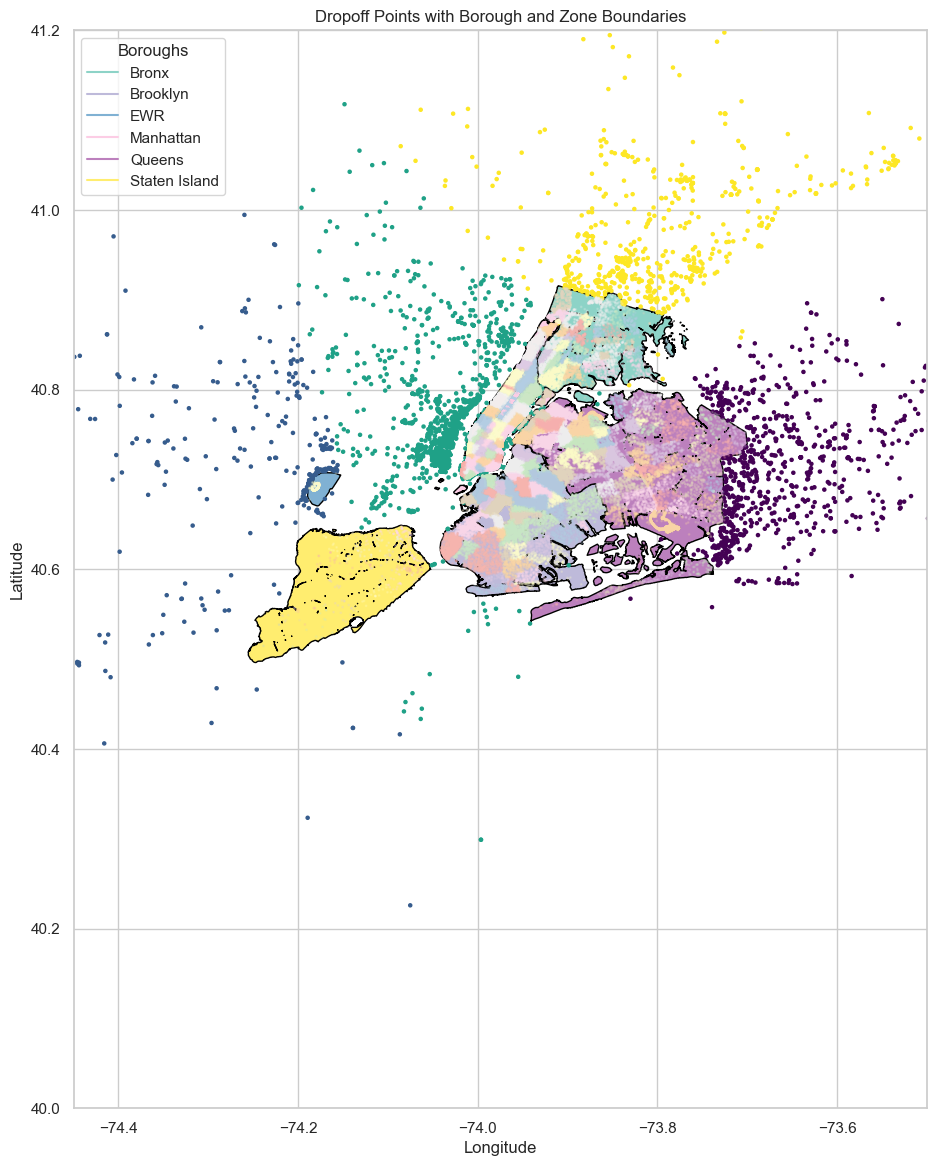

In [220]:

num_boroughs = len(borough_boundaries_gdf.index.unique())
borough_colors = plt.cm.get_cmap('Set3', num_boroughs)(range(num_boroughs))


fig, ax = plt.subplots(1, 1, figsize=(14, 14))
ax.set_xlim(lon_range)
ax.set_ylim(lat_range)


for idx, (name, group) in enumerate(borough_boundaries_gdf.groupby('borough')):
    group.plot(ax=ax, color=borough_colors[idx], alpha=1, edgecolor='black')

gdf_missing_dropoff.plot(ax=ax, column='dropoff_cluster', categorical=True, legend=False, markersize=5, cmap='viridis')

gdf_non_missing_dropoff.plot(ax=ax, column='dropoff_zone', categorical=True, legend=False, markersize=1, cmap='Pastel1', alpha = 0.2)

ax.set_title('Dropoff Points with Borough and Zone Boundaries')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

borough_patches = [plt.Line2D([0], [0], color=borough_colors[idx], label=name, alpha=1) for idx, name in enumerate(borough_boundaries_gdf.index.unique())]
ax.legend(handles=borough_patches, title='Boroughs', loc='upper left')

plt.show()

In [206]:
borough_boundaries_gdf.index.unique()


Index(['Bronx', 'Brooklyn', 'EWR', 'Manhattan', 'Queens', 'Staten Island'], dtype='object', name='borough')

In [213]:
pickup_centroids = kmeans_pickup.cluster_centers_
dropoff_centroids = kmeans_dropoff.cluster_centers_

In [214]:
pickup_cluster_names = [f'Pickup_Cluster_{i}_({centroid[0]:.2f}, {centroid[1]:.2f})' for i, centroid in enumerate(pickup_centroids)]
dropoff_cluster_names = [f'Dropoff_Cluster_{i}_({centroid[0]:.2f}, {centroid[1]:.2f})' for i, centroid in enumerate(dropoff_centroids)]


In [215]:
missing_pickup['pickup_cluster'] = kmeans_pickup.labels_
missing_dropoff['dropoff_cluster'] = kmeans_dropoff.labels_

for i, cluster_name in enumerate(pickup_cluster_names):
    taxi_data.loc[missing_pickup.index[missing_pickup['pickup_cluster'] == i], 'pickup_borough'] = cluster_name

for i, cluster_name in enumerate(dropoff_cluster_names):
    taxi_data.loc[missing_dropoff.index[missing_dropoff['dropoff_cluster'] == i], 'dropoff_borough'] = cluster_name



C:\Users\elkok\AppData\Local\Temp\ipykernel_19488\3834870844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_pickup['pickup_cluster'] = kmeans_pickup.labels_
C:\Users\elkok\AppData\Local\Temp\ipykernel_19488\3834870844.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_dropoff['dropoff_cluster'] = kmeans_dropoff.labels_


In [136]:
taxi_data.isna().sum()

id                                   0
vendor_id                            0
pickup_datetime                      0
dropoff_datetime                     0
passenger_count                      0
pickup_longitude                     0
pickup_latitude                      0
dropoff_longitude                    0
dropoff_latitude                     0
store_and_fwd_flag                   0
trip_duration                        0
month                                0
day                                  0
hour                                 0
minute                               0
calculated_distance                  0
calculated_duration                  0
day_of_week                          0
date                                 0
average temperature                  0
precipitation                        0
snow fall                            0
snow depth                           0
is_holiday                           0
decoded_polyline                  4142
pickup_zone              

In [216]:
taxi_data.to_csv('new_clustered_noBorough_taxi_data.csv',index=False)

I will repeat the same process for the missing zones. Since zones are a lot of more, a significantly higher number of clusters will be generated to match the zoning pattern closely.

In [217]:

missing_pickup_zones = taxi_data[taxi_data['pickup_zone'].isnull()]
missing_dropoff_zones = taxi_data[taxi_data['dropoff_zone'].isnull()]

In [218]:

k = 50  

kmeans_pickup = KMeans(n_clusters=k, random_state=0).fit(missing_pickup_zones[['pickup_latitude', 'pickup_longitude']])
missing_pickup_zones['pickup_cluster'] = kmeans_pickup.labels_

kmeans_dropoff = KMeans(n_clusters=k, random_state=0).fit(missing_dropoff_zones[['dropoff_latitude', 'dropoff_longitude']])
missing_dropoff_zones['dropoff_cluster'] = kmeans_dropoff.labels_


C:\Users\elkok\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\elkok\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\elkok\AppData\Local\Temp\ipykernel_19488\1622828182.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_pickup_zones['pickup_cluster'] = kmeans_pickup.labels_
C:\Users\elkok\anaconda3\lib\site-packages\sklearn\clust

In [233]:
pickup_centroids = kmeans_pickup.cluster_centers_
dropoff_centroids = kmeans_dropoff.cluster_centers_

In [235]:
pickup_cluster_names = [f'Pickup_Cluster_{i}_({centroid[0]:.2f}, {centroid[1]:.2f})' for i, centroid in enumerate(pickup_centroids)]
dropoff_cluster_names = [f'Dropoff_Cluster_{i}_({centroid[0]:.2f}, {centroid[1]:.2f})' for i, centroid in enumerate(dropoff_centroids)]


In [236]:
missing_pickup_zones['pickup_cluster'] = kmeans_pickup.labels_
missing_dropoff_zones['dropoff_cluster'] = kmeans_dropoff.labels_

for i, cluster_name in enumerate(pickup_cluster_names):
    taxi_data.loc[missing_pickup_zones.index[missing_pickup_zones['pickup_cluster'] == i], 'pickup_zone'] = cluster_name

for i, cluster_name in enumerate(dropoff_cluster_names):
    taxi_data.loc[missing_dropoff_zones.index[missing_dropoff_zones['dropoff_cluster'] == i], 'dropoff_zone'] = cluster_name


C:\Users\elkok\AppData\Local\Temp\ipykernel_19488\3668066056.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_pickup_zones['pickup_cluster'] = kmeans_pickup.labels_
C:\Users\elkok\AppData\Local\Temp\ipykernel_19488\3668066056.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_dropoff_zones['dropoff_cluster'] = kmeans_dropoff.labels_


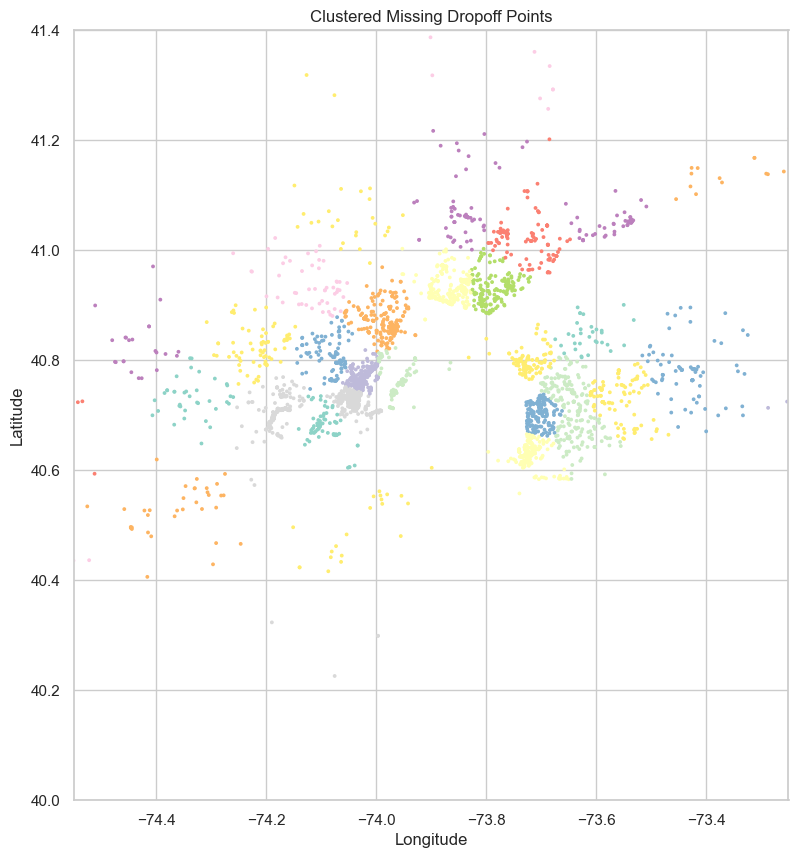

In [229]:

gdf_missing_pickup_zones = gpd.GeoDataFrame(missing_dropoff_zones, geometry=gpd.points_from_xy(missing_dropoff_zones.dropoff_longitude, missing_dropoff_zones.dropoff_latitude))


lon_range = (-74.55, -73.25)
lat_range = (40.0, 41.4)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_xlim(lon_range)
ax.set_ylim(lat_range)
gdf_missing_pickup_zones.plot(ax=ax, column='dropoff_cluster', marker = 'o', categorical=True, legend=False, markersize=3, cmap='Set3')

ax.set_title('Clustered Missing Dropoff Points')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()


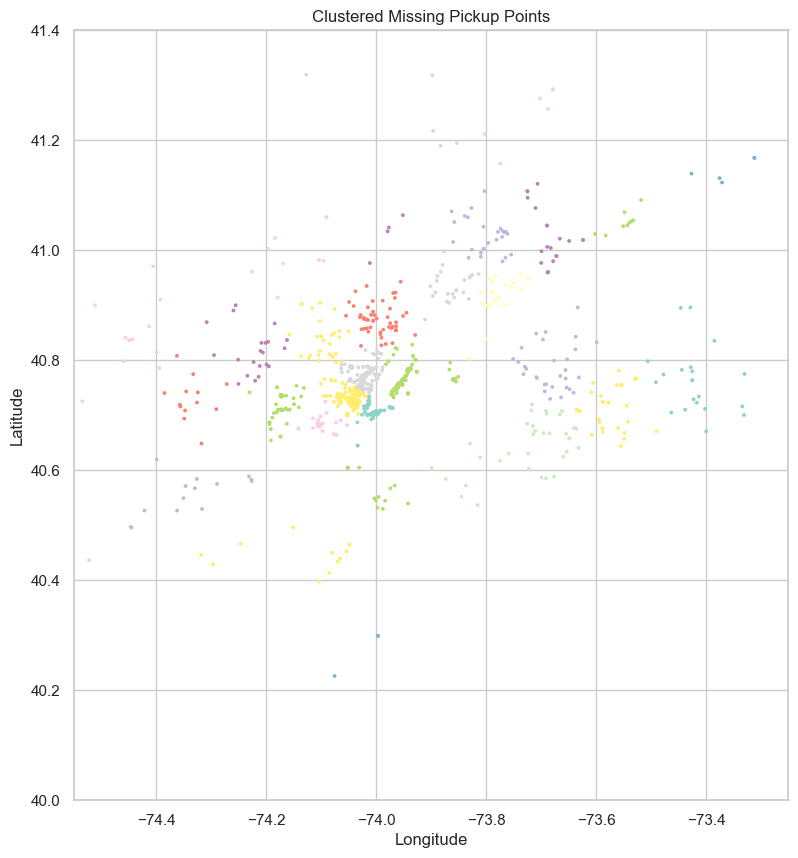

In [230]:

gdf_missing_pickup_zones = gpd.GeoDataFrame(missing_pickup_zones, geometry=gpd.points_from_xy(missing_pickup_zones.pickup_longitude, missing_pickup_zones.pickup_latitude))


lon_range = (-74.55, -73.25)
lat_range = (40.0, 41.4)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_xlim(lon_range)
ax.set_ylim(lat_range)
gdf_missing_pickup_zones.plot(ax=ax, column='pickup_cluster', marker = 'o', categorical=True, legend=False, markersize=3, cmap='Set3')

ax.set_title('Clustered Missing Pickup Points')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()


C:\Users\elkok\AppData\Local\Temp\ipykernel_19488\2614758520.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  borough_colors = plt.cm.get_cmap('Set3', num_boroughs)(range(num_boroughs))


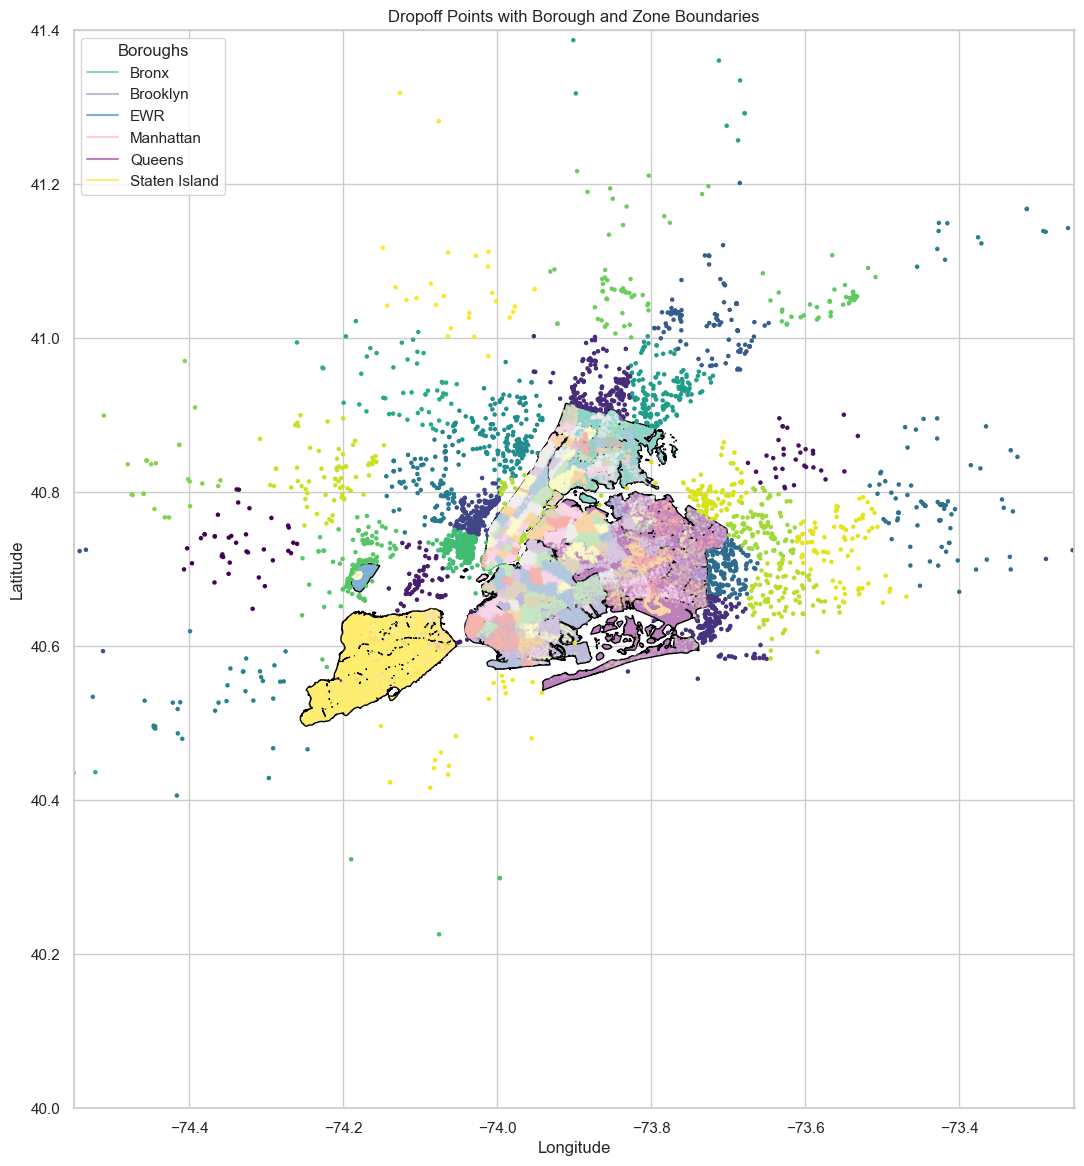

In [232]:

gdf_missing_dropoff_zones = gpd.GeoDataFrame(missing_dropoff_zones, geometry=gpd.points_from_xy(missing_dropoff_zones.dropoff_longitude, missing_dropoff_zones.dropoff_latitude))

gdf_non_missing_dropoff = gpd.GeoDataFrame(non_missing_dropoff, geometry=gpd.points_from_xy(non_missing_dropoff.dropoff_longitude, non_missing_dropoff.dropoff_latitude))

num_boroughs = len(borough_boundaries_gdf.index.unique())
borough_colors = plt.cm.get_cmap('Set3', num_boroughs)(range(num_boroughs))

fig, ax = plt.subplots(1, 1, figsize=(14, 14))
ax.set_xlim(lon_range)
ax.set_ylim(lat_range)

for idx, (name, group) in enumerate(borough_boundaries_gdf.groupby('borough')):
    group.plot(ax=ax, color=borough_colors[idx], alpha=1, edgecolor='black')

gdf_missing_dropoff_zones.plot(ax=ax, column='dropoff_cluster', categorical=True, legend=False, markersize=5, cmap='viridis')

gdf_non_missing_dropoff.plot(ax=ax, column='dropoff_zone', categorical=True, legend=False, markersize=1, cmap='Pastel1', alpha = 0.2)

ax.set_title('Dropoff Points with Borough and Zone Boundaries')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
borough_patches = [plt.Line2D([0], [0], color=borough_colors[idx], label=name, alpha=1) for idx, name in enumerate(borough_boundaries_gdf.index.unique())]
ax.legend(handles=borough_patches, title='Boroughs', loc='upper left')

plt.show()


In [238]:
taxi_data.to_csv('updated_taxi_data_zone_borough_outside_clustered.csv',index=False)

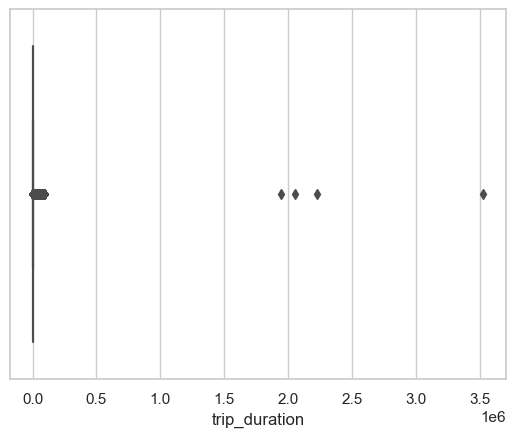

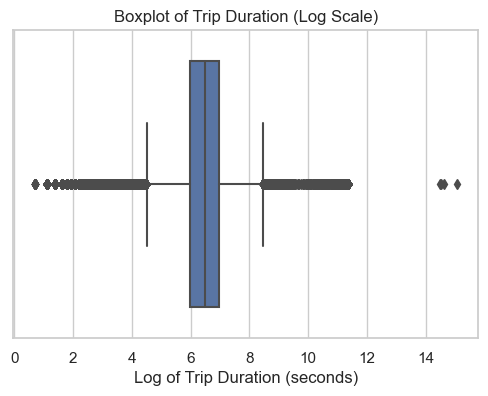

In [243]:
sns.boxplot(x=taxi_data['trip_duration'])

plt.figure(figsize=(6, 4))
sns.boxplot(x=np.log1p(taxi_data['trip_duration']))
plt.title('Boxplot of Trip Duration (Log Scale)')
plt.xlabel('Log of Trip Duration (seconds)')
plt.show()

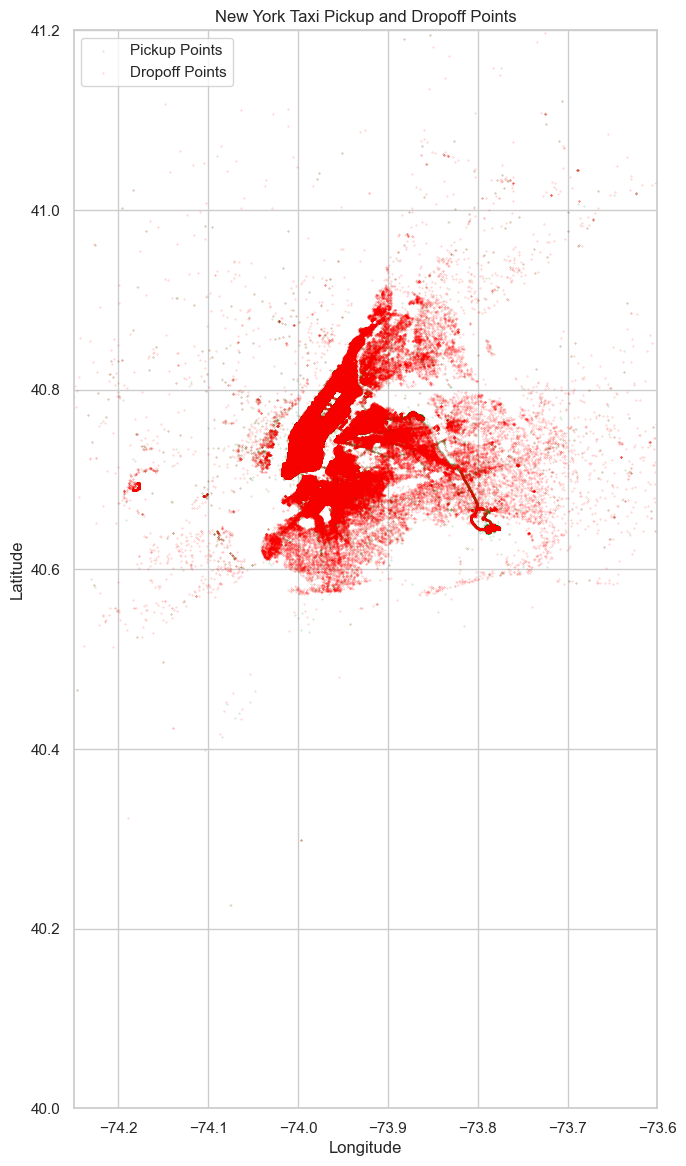

In [252]:

gdf_all_pickup = gpd.GeoDataFrame(taxi_data, geometry=gpd.points_from_xy(taxi_data.pickup_longitude, taxi_data.pickup_latitude))
gdf_all_dropoff = gpd.GeoDataFrame(taxi_data, geometry=gpd.points_from_xy(taxi_data.dropoff_longitude, taxi_data.dropoff_latitude))

lon_range = (-74.25, -73.6)
lat_range = (40.0, 41.2)

fig, ax = plt.subplots(1, 1, figsize=(14, 14))
ax.set_xlim(lon_range)
ax.set_ylim(lat_range)

gdf_all_pickup.plot(ax=ax, marker='o', color='green', markersize=0.1, label='Pickup Points', alpha=0.3)

gdf_all_dropoff.plot(ax=ax, marker='o', color='red', markersize=0.1, label='Dropoff Points', alpha=0.3)

ax.set_title('New York Taxi Pickup and Dropoff Points')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend()

plt.show()


### Feature engineering extended

I will now create a new distance column extracted from the decoded polyline data, since the polyline routes used Google's directions API. Traffic data are incorporated to the suggested polyline route. Additionally I will create a route_points column, which can be an indicator of the complexity of the route. A higher number of points might suggest a more complex route with more turns or changes in direction, potentially affecting the trip duration.

In [1]:

taxi_data = pd.read_csv('updated_taxi_data_routes_clustered_cleaned2.csv')

In [2]:
# First I will drop all the NaN values from the polyline data

In [3]:
taxi_data.isna().sum()


id                                   0
vendor_id                            0
pickup_datetime                      0
dropoff_datetime                     0
passenger_count                      0
pickup_longitude                     0
pickup_latitude                      0
dropoff_longitude                    0
dropoff_latitude                     0
store_and_fwd_flag                   0
trip_duration                        0
month                                0
day                                  0
hour                                 0
minute                               0
calculated_distance                  0
calculated_duration                  0
day_of_week                          0
date                                 0
average temperature                  0
precipitation                        0
snow fall                            0
snow depth                           0
is_holiday                           0
decoded_polyline                  4142
pickup_zone              

In [4]:
taxi_data= taxi_data.dropna(subset=['decoded_polyline'])

In [6]:
taxi_data.isna().sum()

id                                0
vendor_id                         0
pickup_datetime                   0
dropoff_datetime                  0
passenger_count                   0
pickup_longitude                  0
pickup_latitude                   0
dropoff_longitude                 0
dropoff_latitude                  0
store_and_fwd_flag                0
trip_duration                     0
month                             0
day                               0
hour                              0
minute                            0
calculated_distance               0
calculated_duration               0
day_of_week                       0
date                              0
average temperature               0
precipitation                     0
snow fall                         0
snow depth                        0
is_holiday                        0
decoded_polyline                  0
pickup_zone                       0
pickup_borough                    0
dropoff_zone                

In [ ]:


taxi_data['route_length'] = None
taxi_data['num_points'] = None

def extract_route_features(row_tuple):
    index, row = row_tuple
    if pd.notnull(row['decoded_polyline']):
        polyline = ast.literal_eval(row['decoded_polyline'])
        route_length = sum(great_circle(polyline[i], polyline[i+1]).meters for i in range(len(polyline)-1))
        num_points = len(polyline)

    return index, route_length, num_points


def process_data_in_parallel(data, func, workers):

    processed_count = 0
    with ThreadPoolExecutor(max_workers=workers) as executor:

        futures = [executor.submit(func, (index, row)) for index, row in data.iterrows()]
        for future in tqdm(as_completed(futures), total=len(futures), desc='Calculating routes'):
            index, route_length, num_points = future.result()
            data.at[index, 'route_length'] = route_length
            data.at[index, 'num_points'] = num_points
            processed_count += 1
            if processed_count % 1 == 0:
                print(f"Processed {processed_count} rows")
    return data

taxi_data = process_data_in_parallel(taxi_data, extract_route_features, workers=200)

taxi_data.to_csv('updated_taxi_data_routes_clustered_cleaned_polylined2', index=False)
print(taxi_data.head())

I will proceed by creating 2 distinct average speed columns. Using the calculated_distance from the Distance Matrix API, and the route_length that is calculated from the polylines. Both of them will use the trip_duration as time

In [37]:
taxi_data = pd.read_csv('updated_taxi_data_routes_clustered_cleaned_polylined2')

In [38]:
taxi_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_manufacturing_district,pickup_airport,dropoff_airport,pickup_PARK_district,dropoff_PARK_district,route_length,num_points,avg_speed_calculated_distance,avg_speed_route_length,trip_direction
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,0,0,0,0,0,2005.687533,45,4.408791,4.408104,SE
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,0,0,0,0,0,2514.471856,20,3.793363,3.792567,SW
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,0,0,0,0,0,9740.011505,165,4.585217,4.585693,SW
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,0,0,0,0,0,1818.774580,19,4.242424,4.239568,SW
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,0,0,0,0,0,1604.346193,14,3.687356,3.688152,SE


In [73]:
taxi_data = pd.read_csv('updated_engineered_taxi_data_FINAL.csv')

In [76]:
import numpy as np

taxi_data['avg_speed_calculated_distance'] = np.where(
    taxi_data['calculated_duration'] > 0,
    taxi_data['calculated_distance'] / taxi_data['calculated_duration'],
    0
)

taxi_data['avg_speed_route_length'] = np.where(
    taxi_data['calculated_duration'] > 0,
    taxi_data['route_length'] / taxi_data['calculated_duration'],
    0
)

taxi_data[['avg_speed_calculated_distance', 'avg_speed_route_length']]


,avg_speed_calculated_distance,avg_speed_route_length
0,3.614414,3.613851
1,4.122951,4.122085
2,8.813575,8.814490
3,2.879747,2.877808
4,5.474403,5.475584
...,...,...
1454345,5.095890,5.095630
1454346,8.801843,8.799834
1454347,13.677419,13.675743
1454348,2.136915,2.137256


In [77]:
nan_speed_rows = taxi_data[taxi_data[['avg_speed_calculated_distance', 'avg_speed_route_length']].isna().any(axis=1)]
nan_speed_rows

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,trip_direction,week,id_count_trips_hour,id_count_trips_day,id_count_trips_day_of_week,id_count_trips_holidays,total_trips_to_airports,total_trips_from_airports,avg_speed_calculated_distance,avg_speed_route_length


I will also create a feature about Direction. That is going to indicate whether the direction of the taxi is NW, NE, SW, SE, NS, SN, WE, EW.

In [78]:
def calculate_direction(row):
    lat_diff = row['dropoff_latitude'] - row['pickup_latitude']
    lon_diff = row['dropoff_longitude'] - row['pickup_longitude']

    if lat_diff > 0 and lon_diff > 0:
        return 'NE'  
    elif lat_diff > 0 and lon_diff < 0:
        return 'NW'  
    elif lat_diff < 0 and lon_diff > 0:
        return 'SE'  
    elif lat_diff < 0 and lon_diff < 0:
        return 'SW'  
    elif lat_diff > 0:
        return 'N'   
    elif lat_diff < 0:
        return 'S'   
    elif lon_diff > 0:
        return 'E'
    elif lon_diff < 0:
        return 'W'   
    else:
        return 'Stationary' 

taxi_data['trip_direction'] = taxi_data.apply(calculate_direction, axis=1)


In [68]:
taxi_data['trip_direction'].value_counts()

NE            518802
SW            468321
SE            245766
NW            214476
Stationary      5881
N                364
S                355
W                205
E                180
Name: trip_direction, dtype: int64

In [42]:
taxi_data.to_csv('updated_taxi_data_routes_clustered_cleaned_polylined3', index=False)

### Creation of Aggregated features

In [11]:
taxi_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_manufacturing_district,pickup_airport,dropoff_airport,pickup_PARK_district,dropoff_PARK_district,route_length,num_points,avg_speed_calculated_distance,avg_speed_route_length,trip_direction
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,0,0,0,0,0,2005.687533,45,4.408791,4.408104,SE
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,0,0,0,0,0,2514.471856,20,3.793363,3.792567,SW
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,0,0,0,0,0,9740.011505,165,4.585217,4.585693,SW
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,0,0,0,0,0,1818.77458,19,4.242424,4.239568,SW
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,0,0,0,0,0,1604.346193,14,3.687356,3.688152,SE


In [79]:
taxi_data['pickup_datetime'] = pd.to_datetime(taxi_data['pickup_datetime'])

In [80]:
taxi_data['pickup_datetime'] = pd.to_datetime(taxi_data['pickup_datetime'])
taxi_data['hour_minute'] = taxi_data['hour'] * 100 + taxi_data['minute']

taxi_data['avg_speed_minute'] = taxi_data.groupby('minute')['avg_speed_calculated_distance'].transform('mean')
taxi_data['avg_speed_hour_minute'] = taxi_data.groupby('hour_minute')['avg_speed_calculated_distance'].transform('mean')


taxi_data['total_trips_minute'] = taxi_data.groupby('minute')['id'].transform('count')
taxi_data['total_trips_hour_minute'] = taxi_data.groupby('hour_minute')['id'].transform('count')


In [ ]:
avg_speed_hour = taxi_data.groupby('hour')['avg_speed_calculated_distance'].mean().reset_index()
avg_speed_day = taxi_data.groupby('day')['avg_speed_calculated_distance'].mean().reset_index()
avg_speed_day_of_week = taxi_data.groupby('day_of_week')['avg_speed_calculated_distance'].mean().reset_index()
avg_speed_week = taxi_data.groupby('week')['avg_speed_calculated_distance'].mean().reset_index()
avg_speed_month = taxi_data.groupby('month')['avg_speed_calculated_distance'].mean().reset_index()
avg_speed_to_airports = taxi_data.groupby('dropoff_airport')['avg_speed_calculated_distance'].mean().reset_index()
avg_speed_clusters = taxi_data.groupby('joint_cluster')['avg_speed_calculated_distance'].mean().reset_index()
avg_speed_direction = taxi_data.groupby('trip_direction')['avg_speed_calculated_distance'].mean().reset_index()
avg_speed_holiday = taxi_data.groupby('is_holiday')['avg_speed_calculated_distance'].mean().reset_index()
avg_speed_commercial_dropoff = taxi_data.groupby('dropoff_commercial_district')['avg_speed_calculated_distance'].mean().reset_index()
avg_speed_commercial_pickup = taxi_data.groupby('pickup_commercial_district')['avg_speed_calculated_distance'].mean().reset_index()
avg_speed_residential_pickup = taxi_data.groupby('pickup_residential_district')['avg_speed_calculated_distance'].mean().reset_index()
avg_speed_residential_dropoff = taxi_data.groupby('dropoff_residential_district')['avg_speed_calculated_distance'].mean().reset_index()



count_hour = taxi_data.groupby('hour')['id'].count().reset_index()
count_day = taxi_data.groupby('day')['id'].count().reset_index()
count_day_of_week = taxi_data.groupby('day_of_week')['id'].count().reset_index()
count_week = taxi_data.groupby('week')['id'].count().reset_index()
count_month = taxi_data.groupby('month')['id'].count().reset_index()
count_airports = taxi_data.groupby('dropoff_airport')['id'].count().reset_index()
count_clusters = taxi_data.groupby('joint_cluster')['id'].count().reset_index()
count_direction = taxi_data.groupby('trip_direction')['id'].count().reset_index()
count_holiday = taxi_data.groupby('is_holiday')['id'].count().reset_index()
count_commercial_dropoff = taxi_data.groupby('dropoff_commercial_district')['id'].count().reset_index()
count_commercial_pickup = taxi_data.groupby('pickup_commercial_district')['id'].count().reset_index()
count_residential_pickup = taxi_data.groupby('pickup_residential_district')['id'].count().reset_index()
count_residential_dropoff = taxi_data.groupby('dropoff_residential_district')['id'].count().reset_index()
count_trips_borough = taxi_data.groupby(['pickup_borough', 'dropoff_borough'])['id'].count().reset_index()


In [ ]:
taxi_data['avg_duration_hour'] = taxi_data.groupby('hour')['calculated_duration'].transform('mean')
taxi_data['avg_duration_day'] = taxi_data.groupby('day')['calculated_duration'].transform('mean')
taxi_data['avg_duration_day_of_week'] = taxi_data.groupby('day_of_week')['calculated_duration'].transform('mean')
taxi_data['avg_duration_week'] = taxi_data.groupby('week')['calculated_duration'].transform('mean')

taxi_data['avg_duration_minute'] = taxi_data.groupby('minute')['calculated_duration'].transform('mean')
taxi_data['avg_duration_hour_minute'] = taxi_data.groupby('hour_minute')['calculated_duration'].transform('mean')

### PCA on long/lat coordinates

Applying PCA on the pickup and dropoff cordinates of a route.

In [2]:

pickup_coords = taxi_data[['pickup_longitude', 'pickup_latitude']]
dropoff_coords = taxi_data[['dropoff_longitude', 'dropoff_latitude']]

combined_coords = np.concatenate([pickup_coords, dropoff_coords], axis=1)

pca_combined = PCA(n_components=4)
combined_pca = pca_combined.fit_transform(combined_coords)


combined_pca_df = pd.DataFrame(combined_pca, columns=['combined_pc1', 'combined_pc2', 'combined_pc3', 'combined_pc4'])


In [3]:

combined_data1 = pd.concat([taxi_data,combined_pca_df], axis=1)

## Short Exploratory Data Analysis

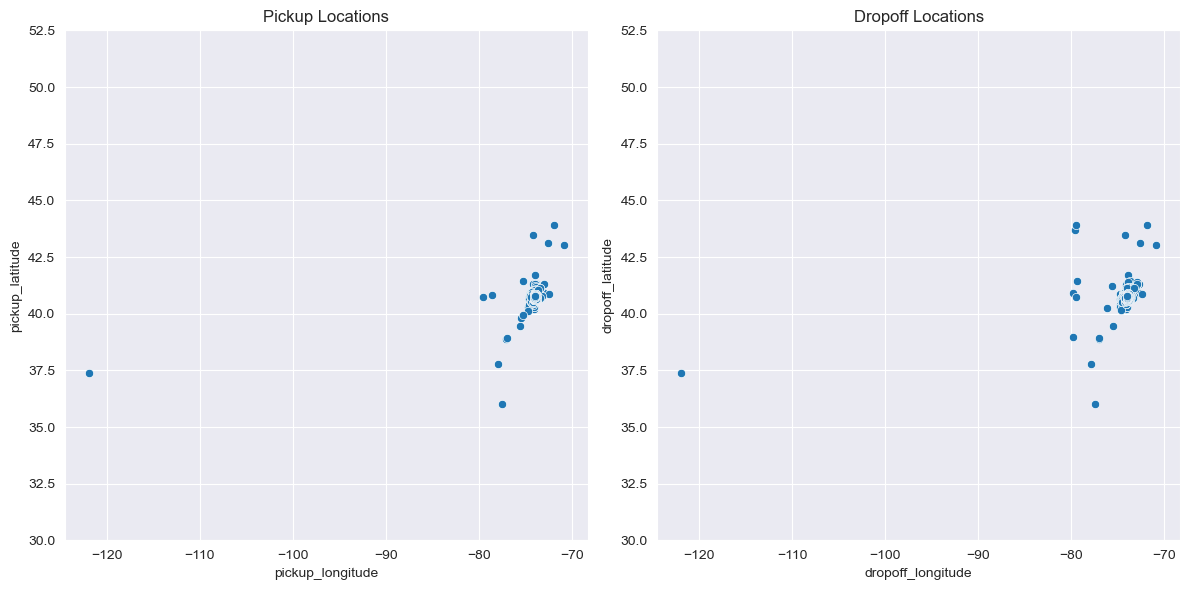

In [47]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

sns.scatterplot(x=merged_dataset['pickup_longitude'], y=merged_dataset['pickup_latitude'], ax=axs[0])
axs[0].set_ylim(30, 52.5)
axs[0].set_title('Pickup Locations')

sns.scatterplot(x=merged_dataset['dropoff_longitude'], y=merged_dataset['dropoff_latitude'], ax=axs[1])
axs[1].set_ylim(30, 52.5)
axs[1].set_title('Dropoff Locations')

plt.tight_layout()
plt.show()

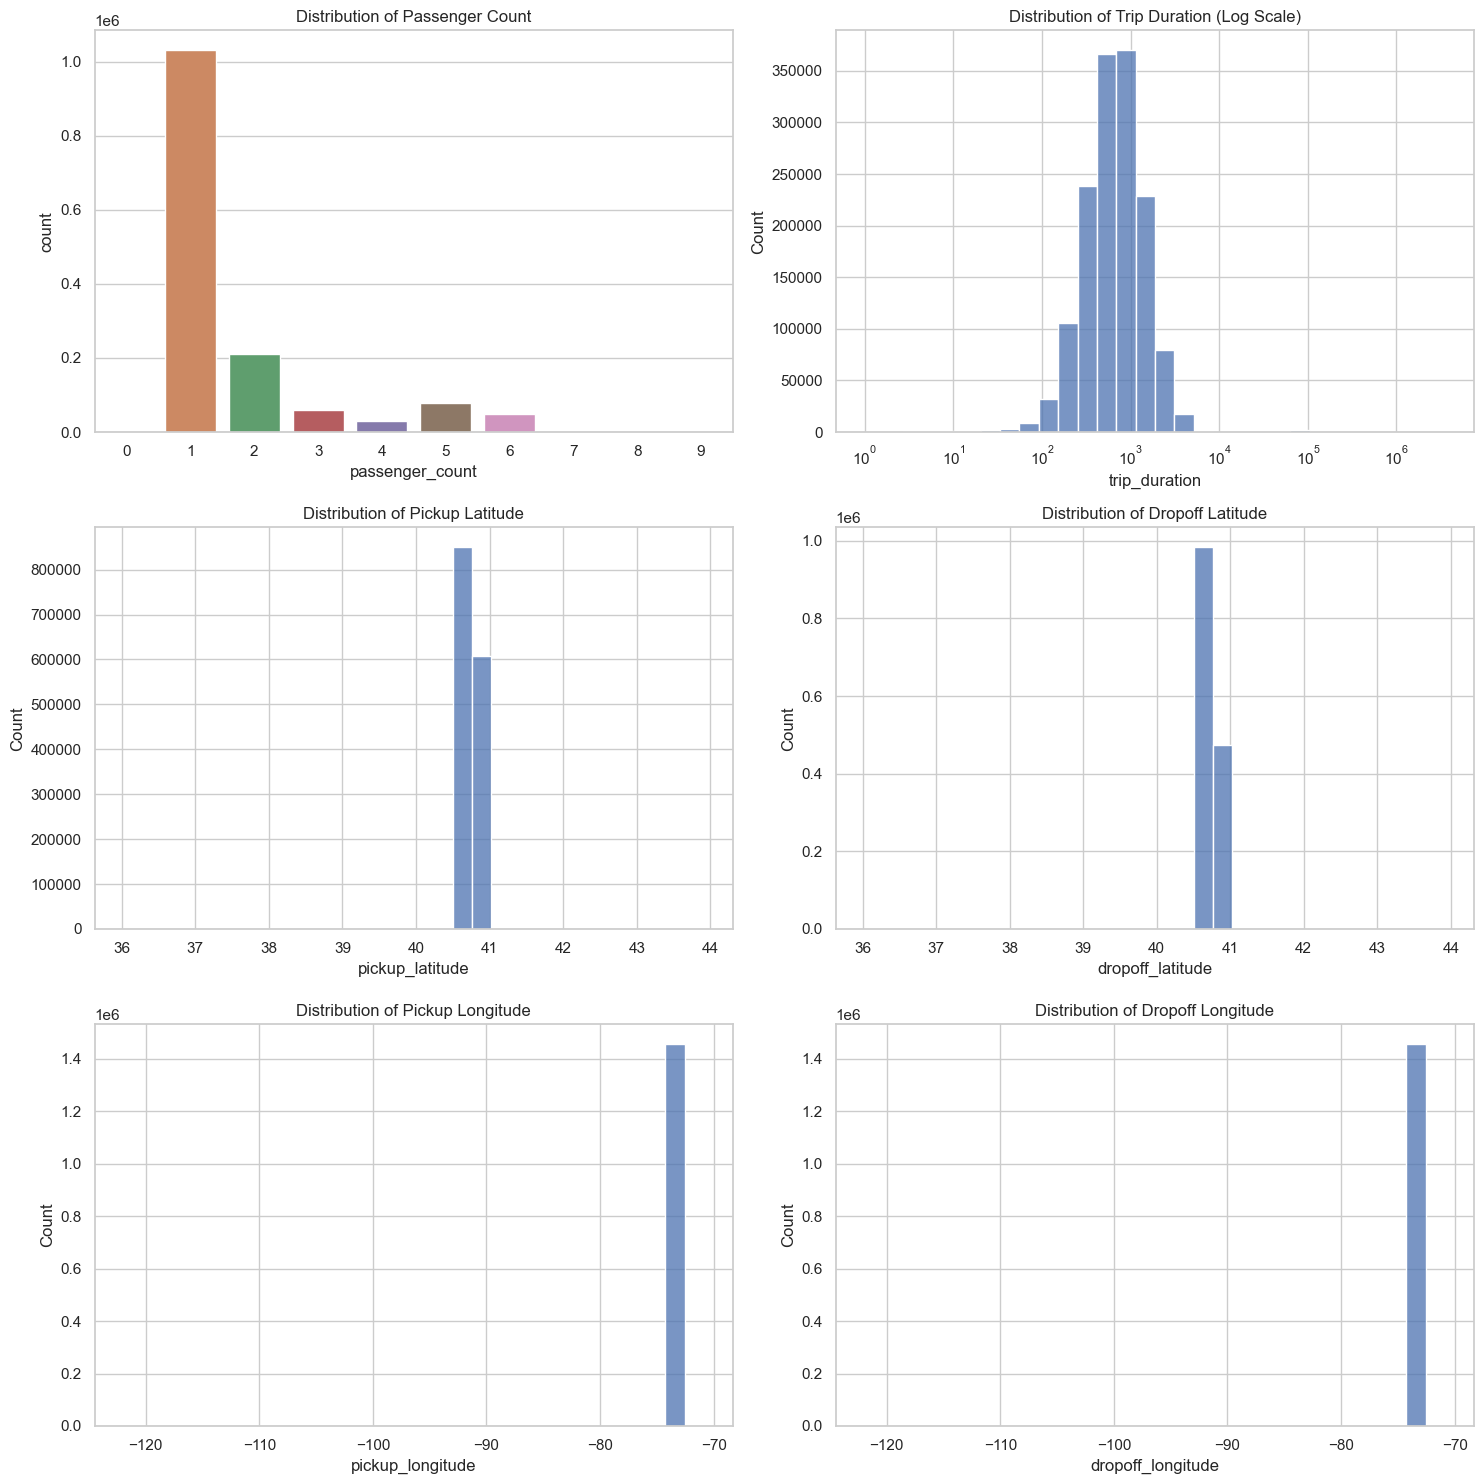

In [48]:

sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

sns.countplot(x='passenger_count', data=taxi_data, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Passenger Count')

sns.histplot(taxi_data['trip_duration'], log_scale=True, bins=30, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Trip Duration (Log Scale)')

sns.histplot(taxi_data['pickup_latitude'], bins=30, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Pickup Latitude')
sns.histplot(taxi_data['dropoff_latitude'], bins=30, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Dropoff Latitude')

sns.histplot(taxi_data['pickup_longitude'], bins=30, ax=axes[2, 0])
axes[2, 0].set_title('Distribution of Pickup Longitude')
sns.histplot(taxi_data['dropoff_longitude'], bins=30, ax=axes[2, 1])
axes[2, 1].set_title('Distribution of Dropoff Longitude')

plt.tight_layout()
plt.show()


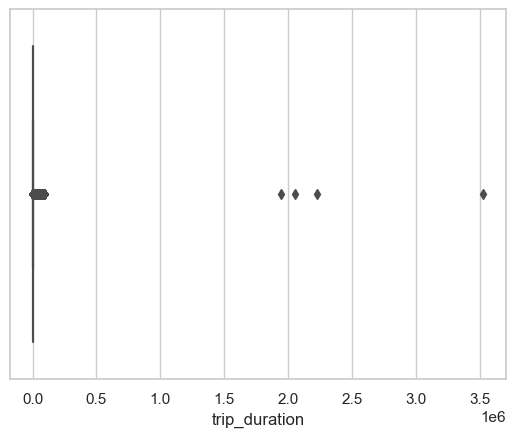

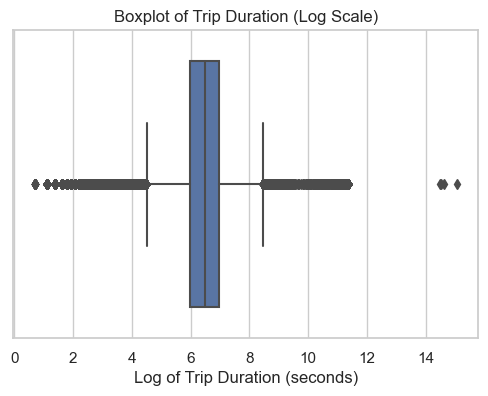

In [61]:

sns.boxplot(x=taxi_data['trip_duration'])

plt.figure(figsize=(6, 4))
sns.boxplot(x=np.log1p(taxi_data['trip_duration']))
plt.title('Boxplot of Trip Duration (Log Scale)')
plt.xlabel('Log of Trip Duration (seconds)')
plt.show()


### Iterative Modelling - Starting with a very simple XGBoost model

I will apply iterative modelling with XGboost. Starting from a simple and moving towards a gradually more complex more. More aggregated features will be created as needed.

Through this process it became clear that several of the already creared aggregated features as well as variables on weather like Snow Fall were not possessing predictive value for the trip durations. Therefore these variables were dropped.

Additionally, clustering was modified in the following. Trips were clustered based on their central coordinate and aggregated features were made. Then all the points were re-clustered based on the consistently highest-contributing factors to the Model.

Variables on Commercial, Residential and Manufacturing districts were adding noise to the model and therefore were also dropped.


#### Simple Clustering based on Central Coordinate of the Trip

In [13]:

taxi_data['central_latitude'] = (taxi_data['pickup_latitude'] + taxi_data['dropoff_latitude']) / 2
taxi_data['central_longitude'] = (taxi_data['pickup_longitude'] + taxi_data['dropoff_longitude']) / 2

X = taxi_data[['central_latitude', 'central_longitude']]

/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

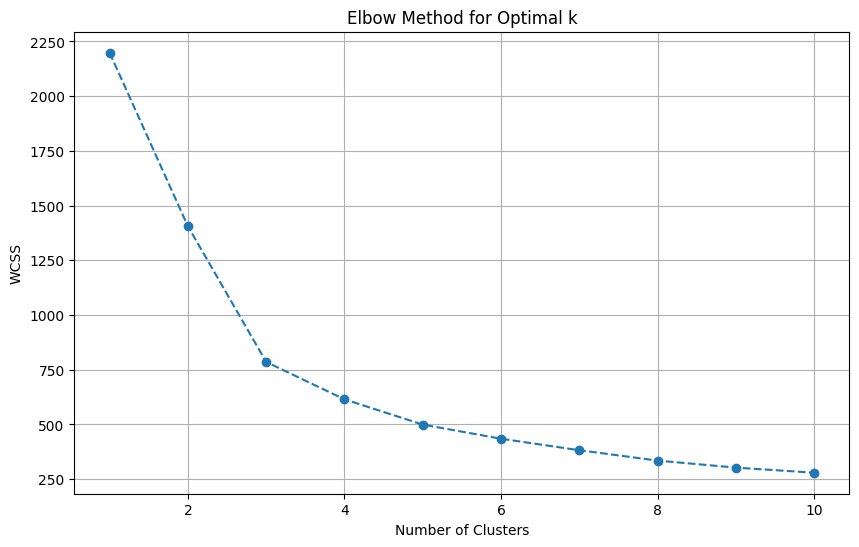

In [6]:

wcss = []
for i in range(1, 11):  # Trying 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [14]:
kmeans = KMeans(n_clusters=3, random_state=0)
taxi_data['cluster'] = kmeans.fit_predict(X)

print(taxi_data.head())


/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


          id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude  trip_duration  ...  count_trips_temperature  \
0         40.765602            455  ...                    2

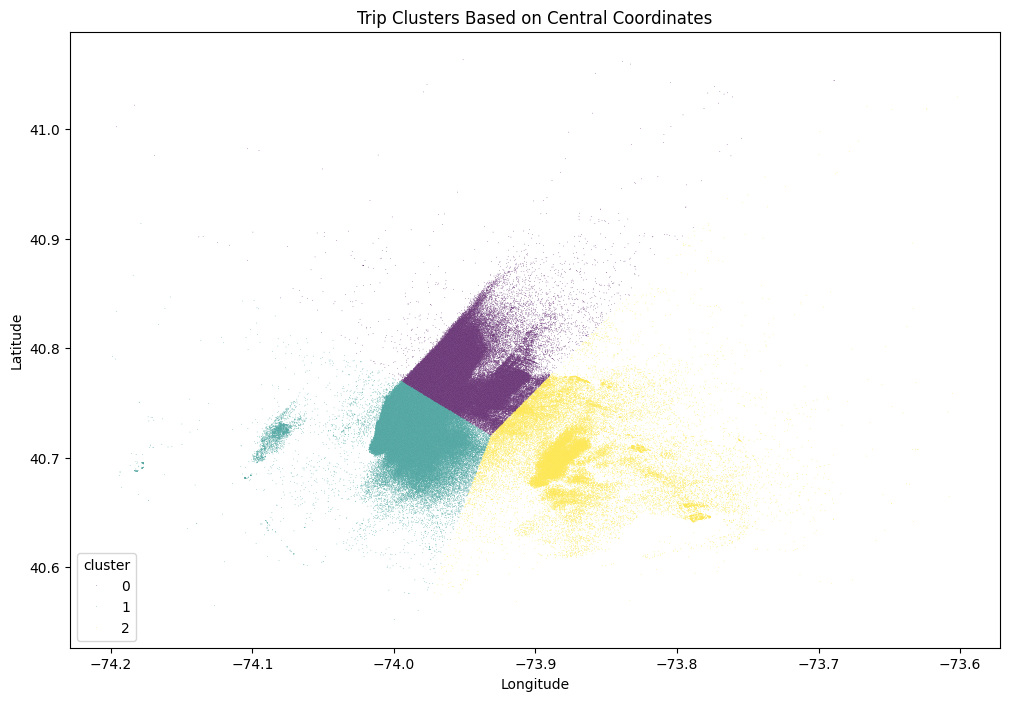

In [15]:

# Plotting the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=taxi_data, x='central_longitude', y='central_latitude', hue='cluster', palette='viridis', s = 0.2, legend='full')
plt.title('Trip Clusters Based on Central Coordinates')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

#### Re-clustering based on the highest features

In [77]:


warnings.filterwarnings('ignore')

numerical_features = ['calculated_distance', 
                      'calculated_duration',
                      'avg_speed_calculated_distance', 'pickup_longitude', 'pickup_latitude',
                      'dropoff_longitude','dropoff_latitude', 'trips_day_hour', 'num_points'
                      
                      
]
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)
        
    ])


X = preprocessor.fit_transform(combined_data1[numerical_features])

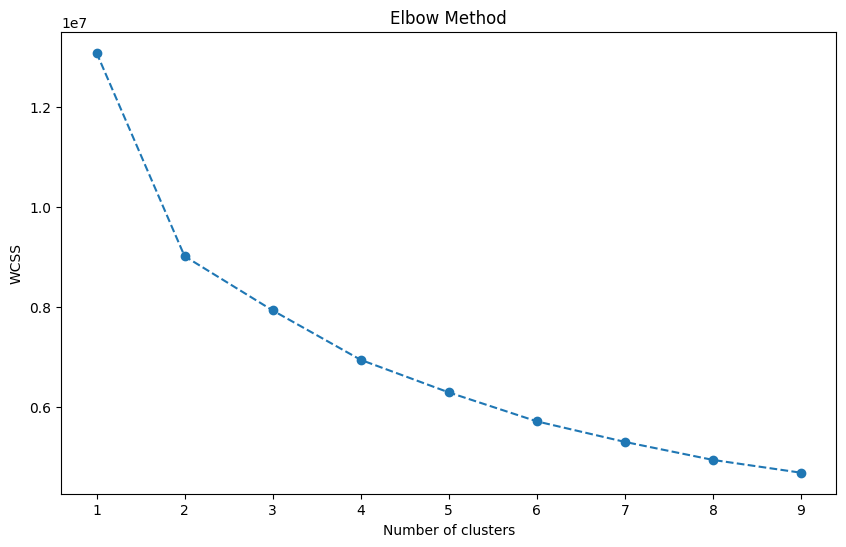

In [64]:
wcss = []
for i in range(1, 10):  # Testing 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the results of the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [78]:

optimal_clusters = 3 
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_optimal.fit(X)

combined_data1['cluster_expanded'] = kmeans_optimal.labels_


In [79]:
combined_data1['cluster_expanded'].value_counts()

cluster_expanded
2    697784
0    614949
1    141033
Name: count, dtype: int64

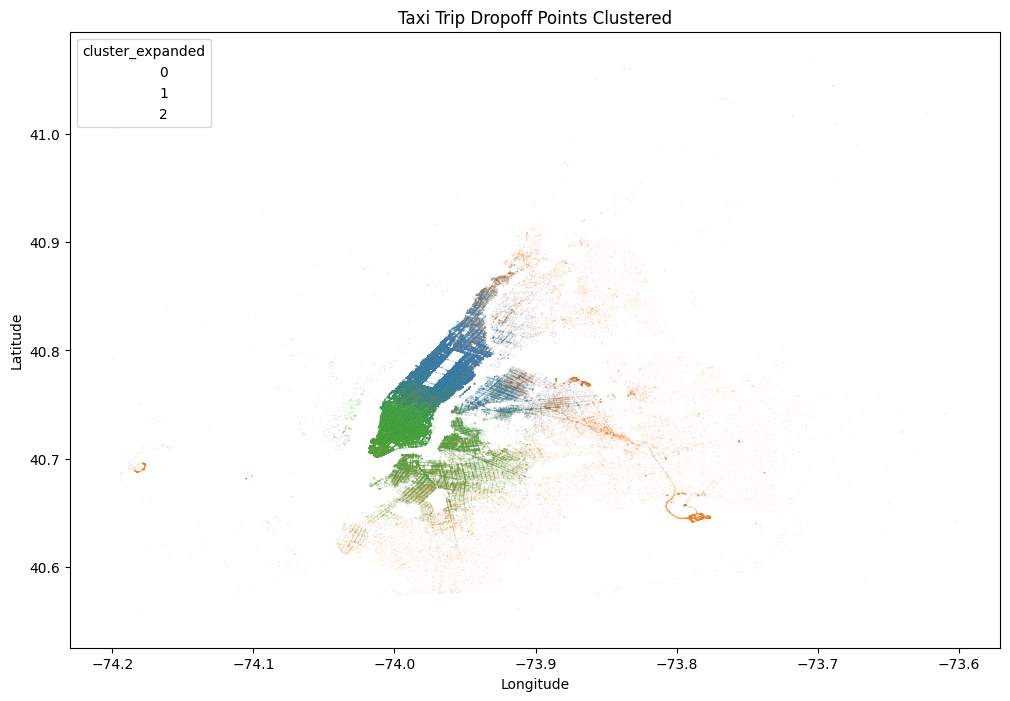

In [80]:

plt.figure(figsize=(12, 8))
palette = sns.color_palette("tab10", combined_data1['cluster_expanded'].nunique())

sns.scatterplot(x='dropoff_longitude', y='dropoff_latitude', hue='cluster_expanded', data=combined_data1, 
                palette=palette, s=0.6, legend='full', alpha=0.1)

plt.title('Taxi Trip Dropoff Points Clustered')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

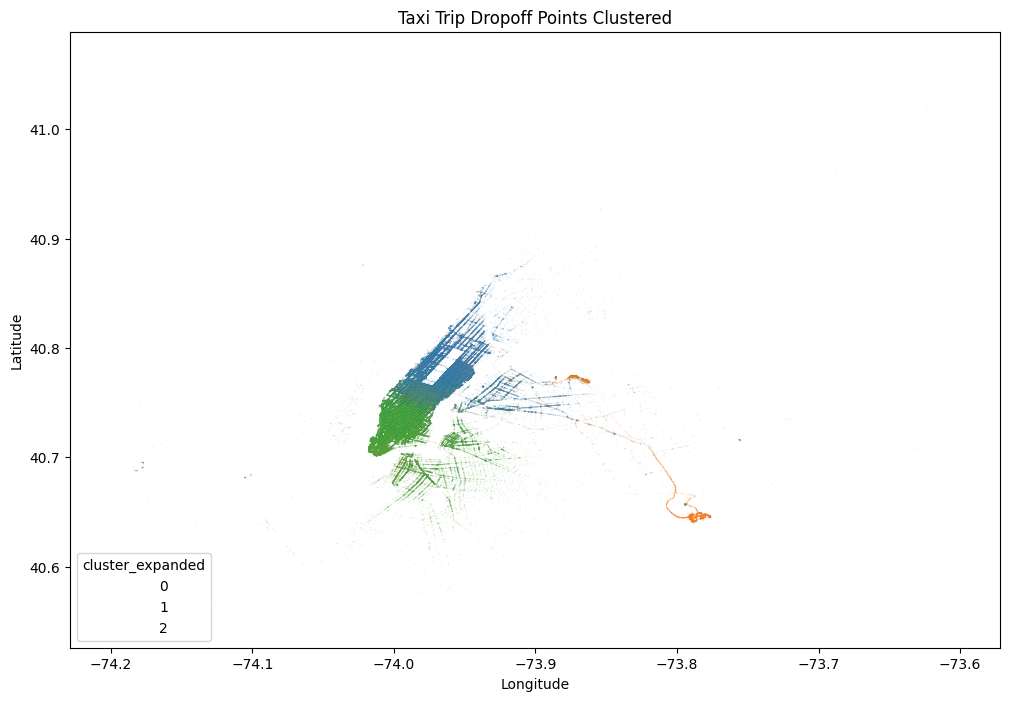

In [81]:

plt.figure(figsize=(12, 8))
palette = sns.color_palette("tab10", combined_data1['cluster_expanded'].nunique())

sns.scatterplot(x='pickup_longitude', y='pickup_latitude', hue='cluster_expanded', data=combined_data1, 
                palette=palette, s=0.6, legend='full', alpha=0.1)

plt.title('Taxi Trip Dropoff Points Clustered')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

In [82]:

numerical_features = ['calculated_distance', 'calculated_duration', 
                      'avg_speed_calculated_distance',
                      'pickup_longitude', 'pickup_latitude', 
                      'dropoff_longitude', 'dropoff_latitude', 'num_points','trips_day_hour']

preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), numerical_features)])
X = preprocessor.fit_transform(test[numerical_features])


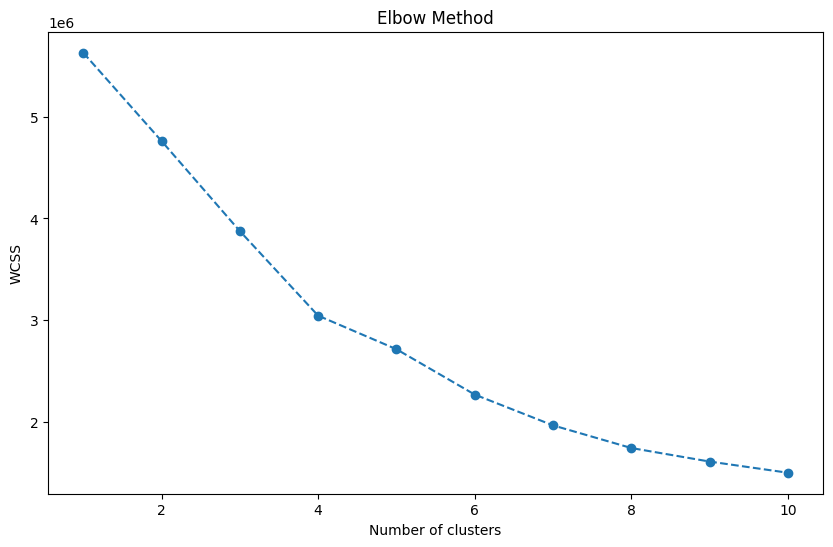

In [71]:

in_range_mask = ((test['pickup_longitude'] >= -74.3) & (test['pickup_longitude'] <= -73.7) & 
                 (test['pickup_latitude'] >= 40.5) & (test['pickup_latitude'] <= 42) &
                 (test['dropoff_longitude'] >= -74.3) & (test['dropoff_longitude'] <= -73.7) & 
                 (test['dropoff_latitude'] >= 40.5) & (test['dropoff_latitude'] <= 42))

in_range_data = test[in_range_mask]


wcss = []
for i in range(1, 11): 
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [83]:
optimal_k = 4

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
in_range_clusters = kmeans.fit_predict(preprocessor.transform(in_range_data[numerical_features]))
test.loc[in_range_mask, 'cluster_expanded'] = in_range_clusters

test.loc[~in_range_mask, 'cluster_expanded'] = -1


In [85]:
mask = ((test['pickup_longitude'] >= -74.3) & (test['pickup_longitude'] <= -73.7) & 
                 (test['pickup_latitude'] >= 40.5) & (test['pickup_latitude'] <= 42) &
                 (test['dropoff_longitude'] >= -74.3) & (test['dropoff_longitude'] <= -73.7) & 
                 (test['dropoff_latitude'] >= 40.5) & (test['dropoff_latitude'] <= 42))

test.loc[~mask, 'cluster_expanded'] = -1


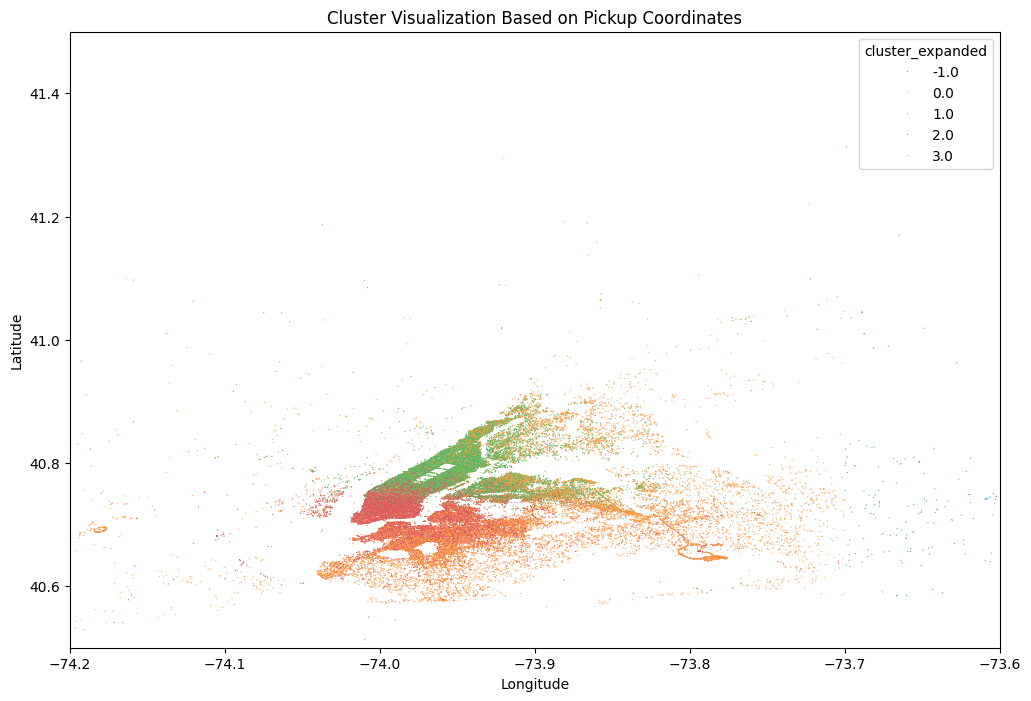

In [75]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=test, x='dropoff_longitude', y='dropoff_latitude', hue='cluster_expanded', palette='tab10', s=0.6)
plt.title('Cluster Visualization Based on Pickup Coordinates')
plt.xlim(-74.2, -73.6)
plt.ylim(40.5, 41.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


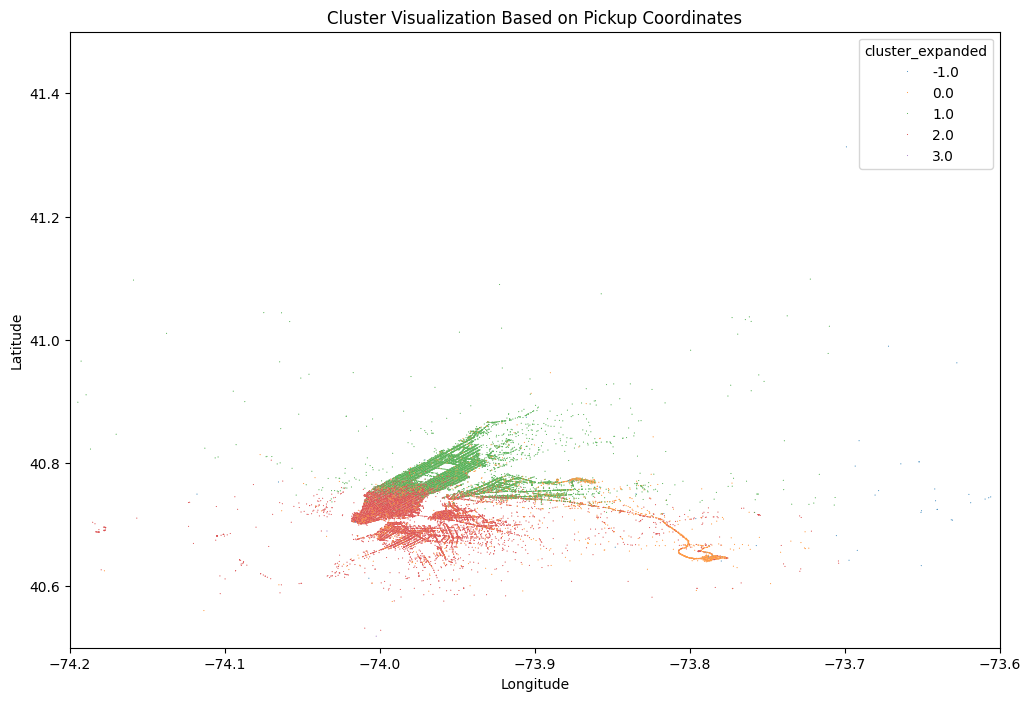

In [87]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=test, x='pickup_longitude', y='pickup_latitude', hue='cluster_expanded', palette='tab10', s=0.6)
plt.title('Cluster Visualization Based on Pickup Coordinates')
plt.xlim(-74.2, -73.6)
plt.ylim(40.5, 41.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


### XGBoost Modelling - with KFolds cross validation and Optuna hyperparameter optimization

In [ ]:

data = train

label_encoders = {}
categorical_columns = ['vendor_id', 'day_of_week', 'discretized_direction']


for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

data.drop(['id', 'pickup_datetime', 'date', 'direction'], axis=1, inplace=True)

features = [col for col in data.columns if col != 'trip_duration']
X = data[features]
y = np.log1p(data['trip_duration']) 

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=0)

def objective(trial):
    param = {
        'objective': 'reg:squarederror',
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1),
        'tree_method': trial.suggest_categorical('tree_method', ['approx', 'hist']),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.001, 35, log=True),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.25),
        'max_depth': trial.suggest_int('max_depth', 1, 12),
        'subsample': trial.suggest_float('subsample', 0.05, 1),
        'alpha': trial.suggest_float('alpha', 1, 35),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'n_estimators': trial.suggest_int('n_estimators', 300, 2800),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 100),
        'n_jobs': -1
    }

    rmsle_scores = []

    for fold, (train_index, val_index) in enumerate(kf.split(X)):
        X_train_kf, X_val_kf = X.iloc[train_index], X.iloc[val_index]
        y_train_kf, y_val_kf = y.iloc[train_index], y.iloc[val_index]

        model = xgb.XGBRegressor(**param)
        model.fit(X_train_kf, y_train_kf, eval_set=[(X_val_kf, y_val_kf)], early_stopping_rounds=10, verbose=False)
        y_pred_kf = model.predict(X_val_kf)
        rmsle_kf = np.sqrt(mean_squared_error(y_val_kf, y_pred_kf))
        rmsle_scores.append(rmsle_kf)

        print(f"Trial {trial.number}, Fold {fold}: RMSLE {rmsle_kf:.4f}")

    avg_rmsle = np.mean(rmsle_scores)
    print(f"Trial {trial.number} Average RMSLE: {avg_rmsle:.4f}")
    return avg_rmsle

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

best_params = study.best_params
best_params.update({'n_jobs':-1}) 
print(f"Training with best parameters: {best_params}")
X_full = pd.concat([X_train, X_val, X_test])
y_full = pd.concat([y_train, y_val, y_test])
model = xgb.XGBRegressor(**best_params)
model.fit(X_full, y_full)

#### Predictions

In [ ]:
for column in categorical_columns:
    if column in test.columns:
        test[column] = label_encoders[column].transform(test[column])

test.drop(['id', 'pickup_datetime', 'date', 'direction'], axis=1, inplace=True)

X_test_final = test[features]

y_test_pred = model.predict(X_test_final)

y_test_pred = np.expm1(y_test_pred)

submission = pd.DataFrame({
    'trip_duration': y_test_pred
})

submission.to_csv('predictions.csv', index=False)

print("Predictions saved to predictions.csv")